In [25]:
import networkx as nx
import matplotlib.pyplot as plt

In [41]:
G=nx.Graph()

In [27]:
locations = [
    "India Gate",
    "Red Fort",
    "Qutub Minar",
    "Connaught Place",
    "Humayun's Tomb",
    "Akshardham Temple",
    "IGI Airport"
]
G.add_nodes_from(locations)

In [28]:
edges = [
    ("India Gate", "Connaught Place", 2.5),
    ("India Gate", "Humayun's Tomb", 4.0),
    ("India Gate", "Akshardham Temple", 7.0),
    ("Connaught Place", "Red Fort", 4.5),
    ("Connaught Place", "IGI Airport", 18.0),
    ("Qutub Minar", "IGI Airport", 12.0),
    ("Qutub Minar", "Humayun's Tomb", 14.0),
    ("Humayun's Tomb", "Akshardham Temple", 9.0),
    ("Red Fort", "Akshardham Temple", 8.0),
    ("IGI Airport", "Humayun's Tomb", 11.0)
]

In [42]:
for u, v, d in edges:
    G.add_edge(u, v, distance=d)

In [30]:
start_point = "Red Fort"
end_point = "Qutub Minar"

In [31]:
try:
    shortest_path = nx.shortest_path(G, source=start_point, target=end_point, weight='distance')
    shortest_distance = nx.shortest_path_length(G, source=start_point, target=end_point, weight='distance')

    print(f"Shortest path from {start_point} to {end_point}:")
    print(" -> ".join(shortest_path))
    print(f"Total distance: {shortest_distance:.2f} km")
except nx.NetworkXNoPath:
    print(f"No path found between {start_point} and {end_point}.")

Shortest path from Red Fort to Qutub Minar:
Red Fort -> Connaught Place -> India Gate -> Humayun's Tomb -> Qutub Minar
Total distance: 25.00 km


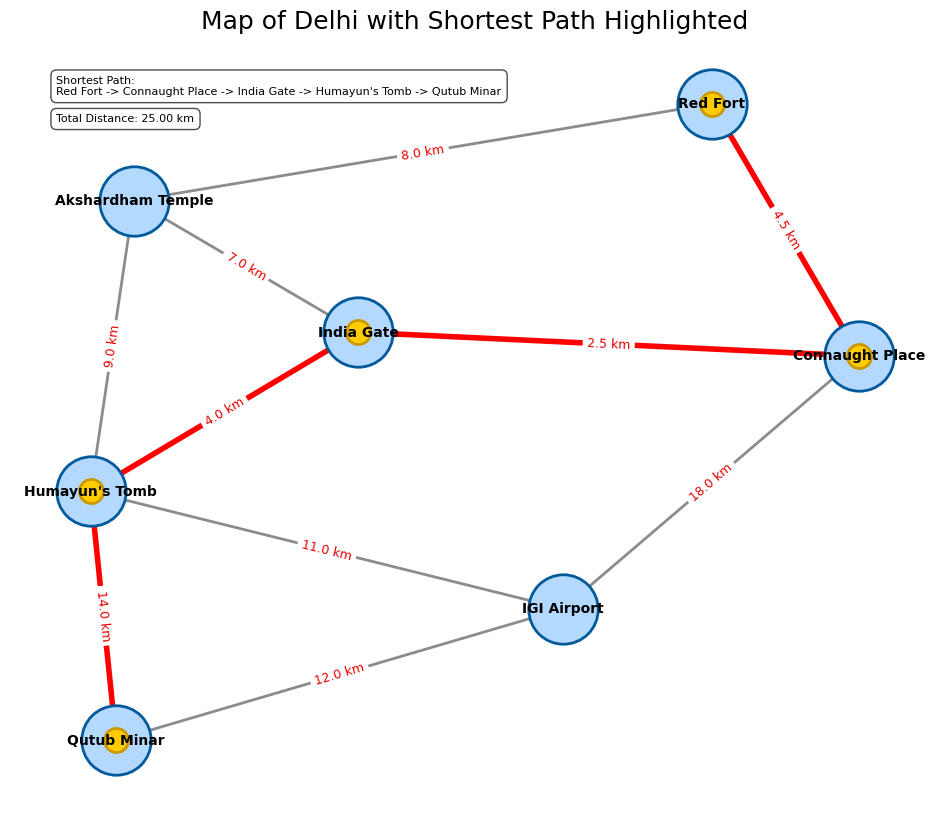

In [32]:
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, weight='inverse_distance', seed=42)

nx.draw_networkx_nodes(G, pos, node_size=2500, node_color='#b3d9ff', edgecolors='#005a99', linewidths=2)
nx.draw_networkx_edges(G, pos, width=2, edge_color='#8c8c8c')

shortest_path_nodes = set(shortest_path)
nx.draw_networkx_nodes(G, pos, nodelist=shortest_path_nodes, node_color='#ffcc00', edgecolors='#cc9900', linewidths=2)

shortest_path_edges = list(zip(shortest_path, shortest_path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=shortest_path_edges, edge_color='red', width=4)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif", font_weight="bold")

edge_labels = nx.get_edge_attributes(G, 'distance')
formatted_edge_labels = {k: f"{v:.1f} km" for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=formatted_edge_labels, font_color='#e60000', font_size=9)

if shortest_path:
    path_text = "Shortest Path:\n" + " -> ".join(shortest_path)
    distance_text = f"Total Distance: {shortest_distance:.2f} km"
    
    plt.text(0.05, 0.95, path_text, transform=plt.gca().transAxes,
             fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.7))
    
    plt.text(0.05, 0.9, distance_text, transform=plt.gca().transAxes,
             fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.7))

plt.title("Map of Delhi with Shortest Path Highlighted", size=18)
plt.axis('off') 
plt.show()
